# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:black">  Lecture 11</span>
### Made by Alessandro Bertarelli

### Exercise 11.1: Single Neuron NN

We're going to start by making a very simple "network" to see if a neuron can learn to replicate a line

In [3]:
import numpy as np

m = 3
b = 2

np.random.seed(0)  ##needed to initialize random funcs in numpy
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1,1, 100)

y_target = m*x_valid + b

sigma = 0.4
y_train = np.random.normal(m*x_train + b, sigma)
y_valid = np.random.normal(m*x_valid+b, sigma)


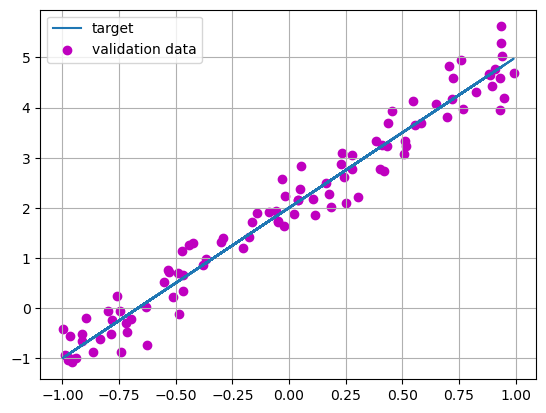

In [4]:
import matplotlib.pyplot as plt


plt.plot(x_valid, y_target, label = 'target')
plt.scatter(x_valid, y_valid, color = 'm', label = 'validation data')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1, input_shape = (1,)))

#compilation

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2024-06-11 14:56:09.546975: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 50, shuffle = True, validation_data = (x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 6ms/step - loss: 8.3837 - mse: 8.3837 - val_loss: 6.3200 - val_mse: 6.3200
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 4.6794 - mse: 4.6794 - val_loss: 3.7853 - val_mse: 3.7853
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 2.8552 - mse: 2.8552 - val_loss: 2.4140 - val_mse: 2.4140
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 1.8516 - mse: 1.8516 - val_loss: 1.5810 - val_mse: 1.5810
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 1.2366 - mse: 1.2366 - val_loss: 1.0558 - val_mse: 1.0558
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.8481 - mse: 0.8481 - val_loss: 0.7227 - val_mse: 0.7227
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6015 - mse: 0.6015 - val_loss: 0.5108 - val_mse: 0.5108
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.4440 - mse: 0.44

In [11]:
##return weights and biases

model.get_weights()

[array([[3.002459]], dtype=float32), array([2.0081692], dtype=float32)]

In a very rare case for NNs we can actually look at the weights and see that it has learned the linear function with a slope of 3 and intercept of 2

In [14]:
score = model.evaluate(x_valid, y_valid, batch_size = 32, verbose = 1) ###evaluated against validation data

print()
print('Test loss', score[0])
print('Test accuracy',score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.1316 - mse: 0.1316

Test loss 0.13158611953258514
Test accuracy 0.13158611953258514


In [16]:
score = model.evaluate(x_valid, y_target, batch_size = 32, verbose = 1)   ####evaluated against target data
print()
print('Test loss', score[0])
print('Test accuracy',score[1])

4/4 [==============================] - 0s 2ms/step - loss: 6.7512e-05 - mse: 6.7512e-05

Test loss 6.751204637112096e-05
Test accuracy 6.751204637112096e-05


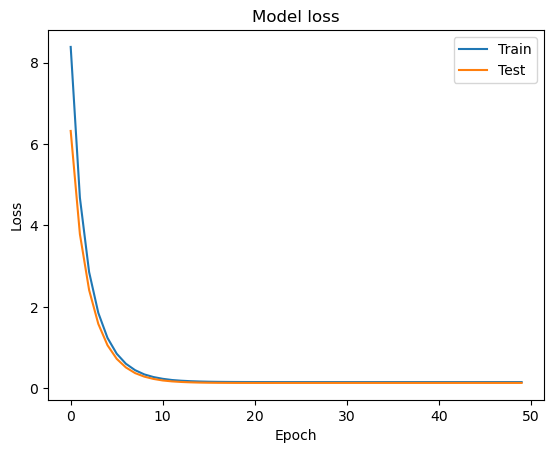

In [18]:
### Look into history and plot fun stuff
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'], loc = 'best')

4/4 [==============================] - 0s 1ms/step


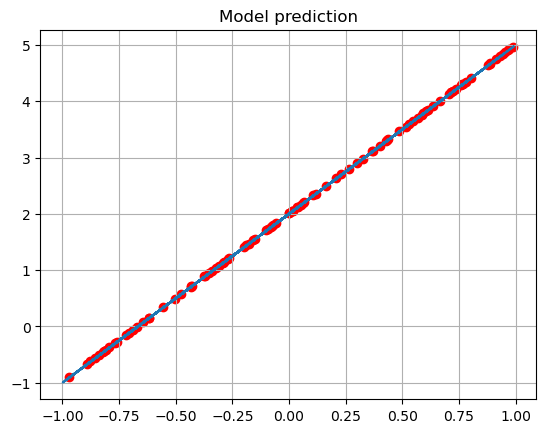

In [20]:
#######  predict f(x) with new x values
x_predicted = np.random.uniform(-1,1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color = 'r')
plt.plot(x_valid, y_target)
plt.title("Model prediction")
plt.grid(True)
plt.show()

### Exercise 11.2: Fit 3rd order polynomial

We want to teach the NN to fit the polynomial $p(x) =  3x^3 -2x^2 -3x + 4$ for x in $[-1, 1]$

In [24]:
a = 3
b = -2
c = -3
d = 4

np.random.seed(0)  ##needed to initialize random funcs in numpy
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1,1, 100)

y_target = a*x_valid**3+b*x_valid**2+c*x_valid+d

sigma = 0.35
y_train = np.random.normal(a*x_train**3+b*x_train**2+c*x_train+d, sigma)
y_valid = np.random.normal(a*x_valid**3+b*x_valid**2+c*x_valid+d, sigma)


In [39]:
model = Sequential()

model.add(Dense(1, input_shape=(1,), activation='elu'))
##    hidden layers
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(10, activation='selu'))
model.add(Dense(10, activation='relu'))


# Last layer 
model.add(Dense(1, activation='elu'))
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [28]:
history = model.fit(x = x_train, y = y_train, batch_size = 64, epochs = 128, shuffle = True, validation_data = (x_valid, y_valid))
score = model.evaluate(x_valid, y_valid, batch_size = 64, verbose = 1) ###evaluated against validation data

print()
print('Test loss', score[0])
print('Test accuracy',score[1])

Epoch 1/128
16/16 [==============================] - 1s 18ms/step - loss: 10.7026 - mse: 10.7026 - val_loss: 7.8799 - val_mse: 7.8799
Epoch 2/128
16/16 [==============================] - 0s 5ms/step - loss: 6.8459 - mse: 6.8459 - val_loss: 4.1399 - val_mse: 4.1399
Epoch 3/128
16/16 [==============================] - 0s 5ms/step - loss: 3.1617 - mse: 3.1617 - val_loss: 1.4645 - val_mse: 1.4645
Epoch 4/128
16/16 [==============================] - 0s 4ms/step - loss: 1.2042 - mse: 1.2042 - val_loss: 1.0270 - val_mse: 1.0270
Epoch 5/128
16/16 [==============================] - 0s 5ms/step - loss: 0.9446 - mse: 0.9446 - val_loss: 0.9901 - val_mse: 0.9901
Epoch 6/128
16/16 [==============================] - 0s 4ms/step - loss: 0.8408 - mse: 0.8408 - val_loss: 0.8652 - val_mse: 0.8652
Epoch 7/128
16/16 [==============================] - 0s 6ms/step - loss: 0.7515 - mse: 0.7515 - val_loss: 0.8131 - val_mse: 0.8131
Epoch 8/128
16/16 [==============================] - 0s 5ms/step - loss: 0.6851 

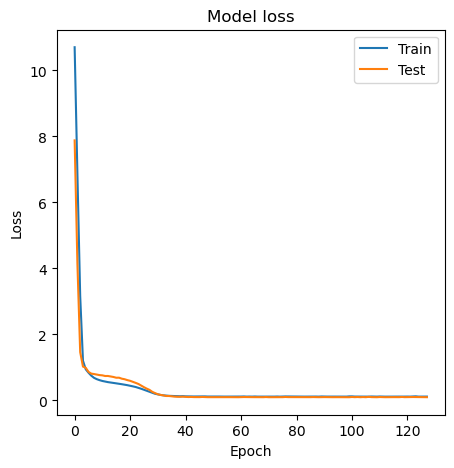

In [30]:
### Look into history and plot fun stuff
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'], loc = 'best')

4/4 [==============================] - 0s 7ms/step


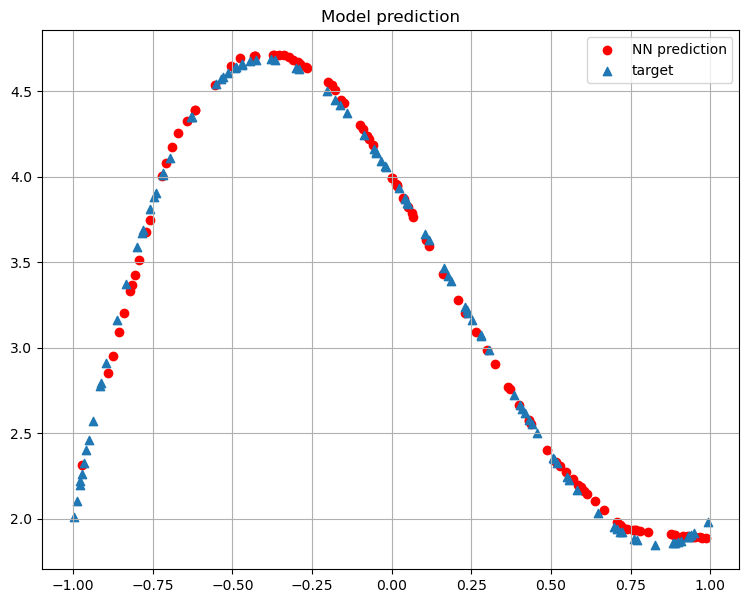

In [32]:
#######  predict f(x) with new x values

plt.figure(figsize = (9,7))
x_predicted = np.random.uniform(-1,1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color = 'r', label = "NN prediction")
plt.scatter(x_valid, y_target, marker = '^', label = "target")
plt.title("Model prediction")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

What happens if we ask the NN to make a prediction outside of the range it was trained on?

10/10 [==============================] - 0s 6ms/step


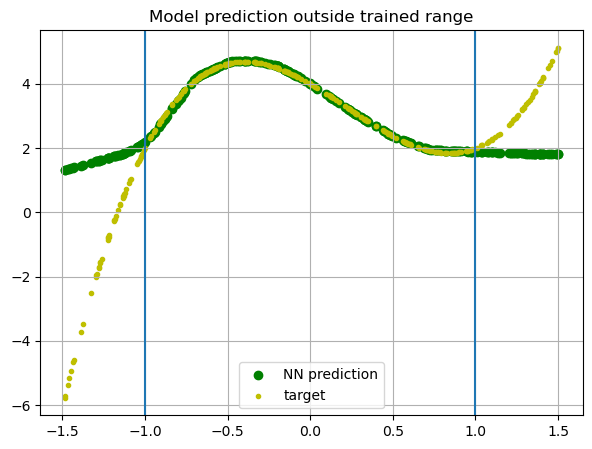

In [35]:
plt.figure(figsize = (7,5))

x_new = np.random.uniform(-1.5, 1.5, 300)
y_new = model.predict(x_new)

y_target = a*x_new**3+b*x_new**2+c*x_new+d

plt.scatter(x_new, y_new, color = 'g', label = "NN prediction")
plt.scatter(x_new, y_target, marker = '.', color = 'y', label = "target")
plt.axvline(-1.0)
plt.axvline(1.0)
plt.title("Model prediction outside trained range")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Ouch... It seems that the NN is only good within the range it was trained on...

Let's show the same problem solved by a different NN (I actually tried various ones and I'm showing what I think is good) 

In [75]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='relu'))
##    hidden layers
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'elu'))
model.add(Dense(16, activation = 'elu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'elu'))

# Last layer 
model.add(Dense(1, activation='linear'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10)



model.compile(optimizer = 'nadam', loss = 'logcosh', metrics = ['mse'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 1)                 2         
                                                                 
 dense_46 (Dense)            (None, 16)                32        
                                                                 
 dense_47 (Dense)            (None, 8)                 136       
                                                                 
 dense_48 (Dense)            (None, 16)                144       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 8)                 72        
                                                                 
 dense_51 (Dense)            (None, 1)                

In [77]:
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 100, shuffle = True, validation_data = (x_valid, y_valid), callbacks=[early_stopping])
score = model.evaluate(x_valid, y_valid, batch_size = 32, verbose = 1) ###evaluated against validation data

print()
print('Test loss', score[0])
print('Test accuracy',score[1])



Epoch 1/100
32/32 [==============================] - 3s 15ms/step - loss: 2.4804 - mse: 11.1836 - val_loss: 1.9482 - val_mse: 7.9197
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 1.4590 - mse: 5.4342 - val_loss: 0.7420 - val_mse: 2.2013
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5309 - mse: 1.5981 - val_loss: 0.6026 - val_mse: 1.9818
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4322 - mse: 1.2093 - val_loss: 0.5038 - val_mse: 1.4901
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3895 - mse: 1.0418 - val_loss: 0.4556 - val_mse: 1.2755
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3683 - mse: 0.9619 - val_loss: 0.4320 - val_mse: 1.1839
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.3502 - mse: 0.8925 - val_loss: 0.4197 - val_mse: 1.1484
Epoch 8/100
32/32 [==============================] - 0s 9ms/step - loss: 0.3378 -

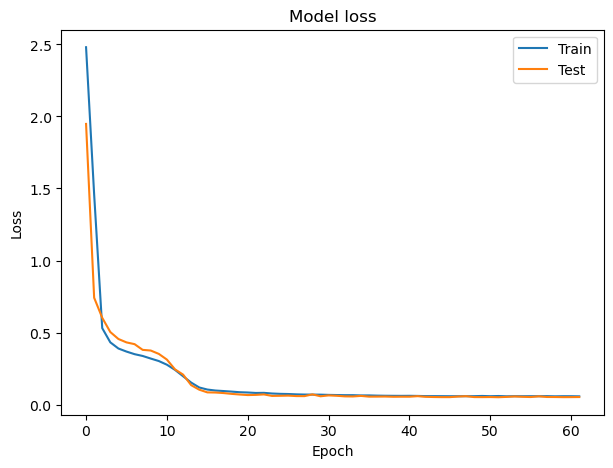

In [79]:
### Look into history and plot fun stuff
plt.figure(figsize = (7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'], loc = 'best')

4/4 [==============================] - 0s 2ms/step


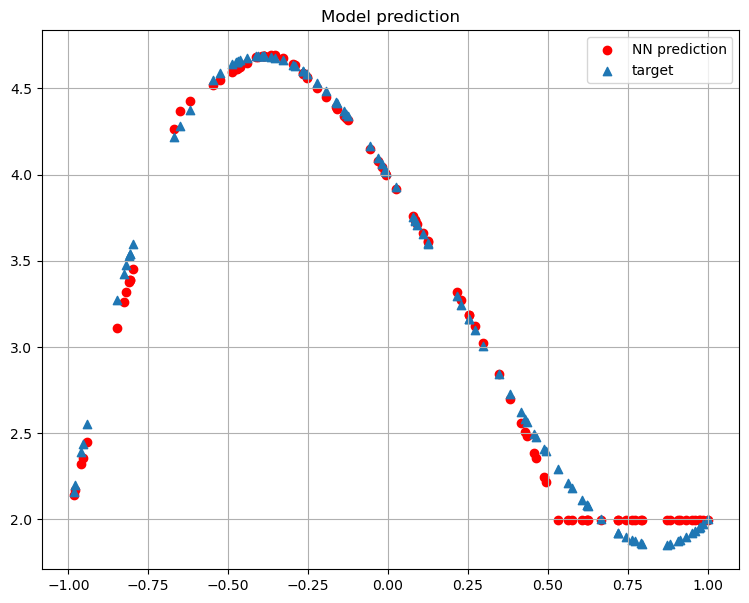

In [81]:
#######  predict f(x) with new x values

plt.figure(figsize = (9,7))
x_predicted = np.random.uniform(-1,1, 100)
y_target = a*x_predicted**3+b*x_predicted**2+c*x_predicted+d
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color = 'r', label = "NN prediction")
plt.scatter(x_predicted, y_target, marker = '^', label = "target")
plt.title("Model prediction")
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

After testing with various different setup it seems that, at least for this specific fitting problem:

- The optimal number of parameters is in the 250-450 range, more than that and there tends to be overfitting or stagnation in local minima
- It seems more useful to have more, smaller (4-10 neurons) layers rather than a couple of wide layers
- There doesn't seem to be a clear indication of which activation function works best between elu, Selu and Relu
- Among the optimizers, they all seem to work decently, except Adadelta, for some reason (odd, given that it's supposed to be a better version of Adagrad). Adam and Nadam seem to work best
- For the loss functions MAE, MSE and logcosh seem to work similarly in this case

#### Exercise 11.3: Fitting $R^2$ -> $R$ function

We want to create a model that fits the function $f(x, y) = sin(x^2 + y^2)$  with  $x \in [-\frac{3}{2}, \frac{3}{2}]$ and $y \in [-\frac{3}{2}, \frac{3}{2}]$

In [86]:
def sin2d(x, y):
    return np.sin(x**2+y**2)

np.random.seed(0)  ##needed to initialize random funcs in numpy
x_train = np.random.uniform(-3./2, 3./2, 8000)
y_train = np.random.uniform(-3./2, 3./2, 8000)

x_valid = np.random.uniform(-3./2,3./2, 2000)
y_valid = np.random.uniform(-3./2,3./2, 2000)


z_target = sin2d(x_valid, y_valid)

sigma = 0.2
z_train = np.random.normal(sin2d(x_train, y_train), sigma)
z_valid = np.random.normal(sin2d(x_valid, y_valid), sigma)


In [106]:
from keras.layers import LeakyReLU, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='tanh'))
##    hidden layers
model.add(Dense(64,activation= LeakyReLU(alpha = 0.1)))
model.add(Dense(256,activation= LeakyReLU(alpha = 0.1)))
model.add(Dense(256, activation= 'tanh'))
model.add(Dense(64, activation= 'tanh'))
model.add(Dense(1, activation='linear'))
model.add(Dense(64,activation= LeakyReLU(alpha = 0.1)))
model.add(Dense(256,activation= LeakyReLU(alpha = 0.1)))
model.add(Dense(256, activation= 'tanh'))
model.add(Dense(64, activation= 'tanh'))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer= optimizer, loss='mse', metrics=['mse'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1)                 3         
                                                                 
 dense_65 (Dense)            (None, 64)                128       
                                                                 
 dense_66 (Dense)            (None, 256)               16640     
                                                                 
 dense_67 (Dense)            (None, 256)               65792     
                                                                 
 dense_68 (Dense)            (None, 64)                16448     
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
 dense_70 (Dense)            (None, 64)              

In [108]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(np.column_stack((x_train, y_train)), z_train, batch_size=64, epochs=100, shuffle = True,
                    validation_data=(np.column_stack((x_valid, y_valid)), z_valid), callbacks = [early_stopping])

score = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid)
print()
print('Test loss', score[0])
print('Test accuracy',score[1])



Epoch 1/100
125/125 [==============================] - 3s 11ms/step - loss: 0.1960 - mse: 0.1960 - val_loss: 0.1925 - val_mse: 0.1925
Epoch 2/100
125/125 [==============================] - 1s 8ms/step - loss: 0.1862 - mse: 0.1862 - val_loss: 0.1950 - val_mse: 0.1950
Epoch 3/100
125/125 [==============================] - 1s 9ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 0.1784 - val_mse: 0.1784
Epoch 4/100
125/125 [==============================] - 1s 10ms/step - loss: 0.1758 - mse: 0.1758 - val_loss: 0.1808 - val_mse: 0.1808
Epoch 5/100
125/125 [==============================] - 1s 9ms/step - loss: 0.1727 - mse: 0.1727 - val_loss: 0.1727 - val_mse: 0.1727
Epoch 6/100
125/125 [==============================] - 1s 8ms/step - loss: 0.1681 - mse: 0.1681 - val_loss: 0.1483 - val_mse: 0.1483
Epoch 7/100
125/125 [==============================] - 1s 12ms/step - loss: 0.1586 - mse: 0.1586 - val_loss: 0.1656 - val_mse: 0.1656
Epoch 8/100
125/125 [==============================] - 1s 11ms/ste

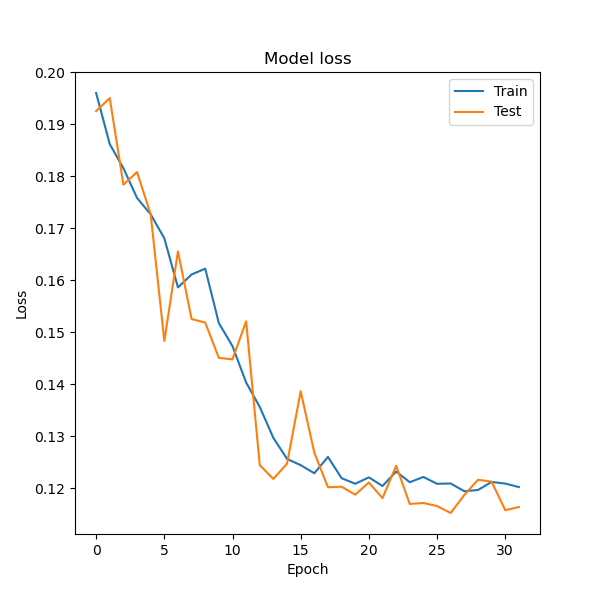

In [109]:
### Look into history and plot fun stuff
plt.figure(figsize = (6,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'], loc = 'best')

32/32 [==============================] - 0s 4ms/step


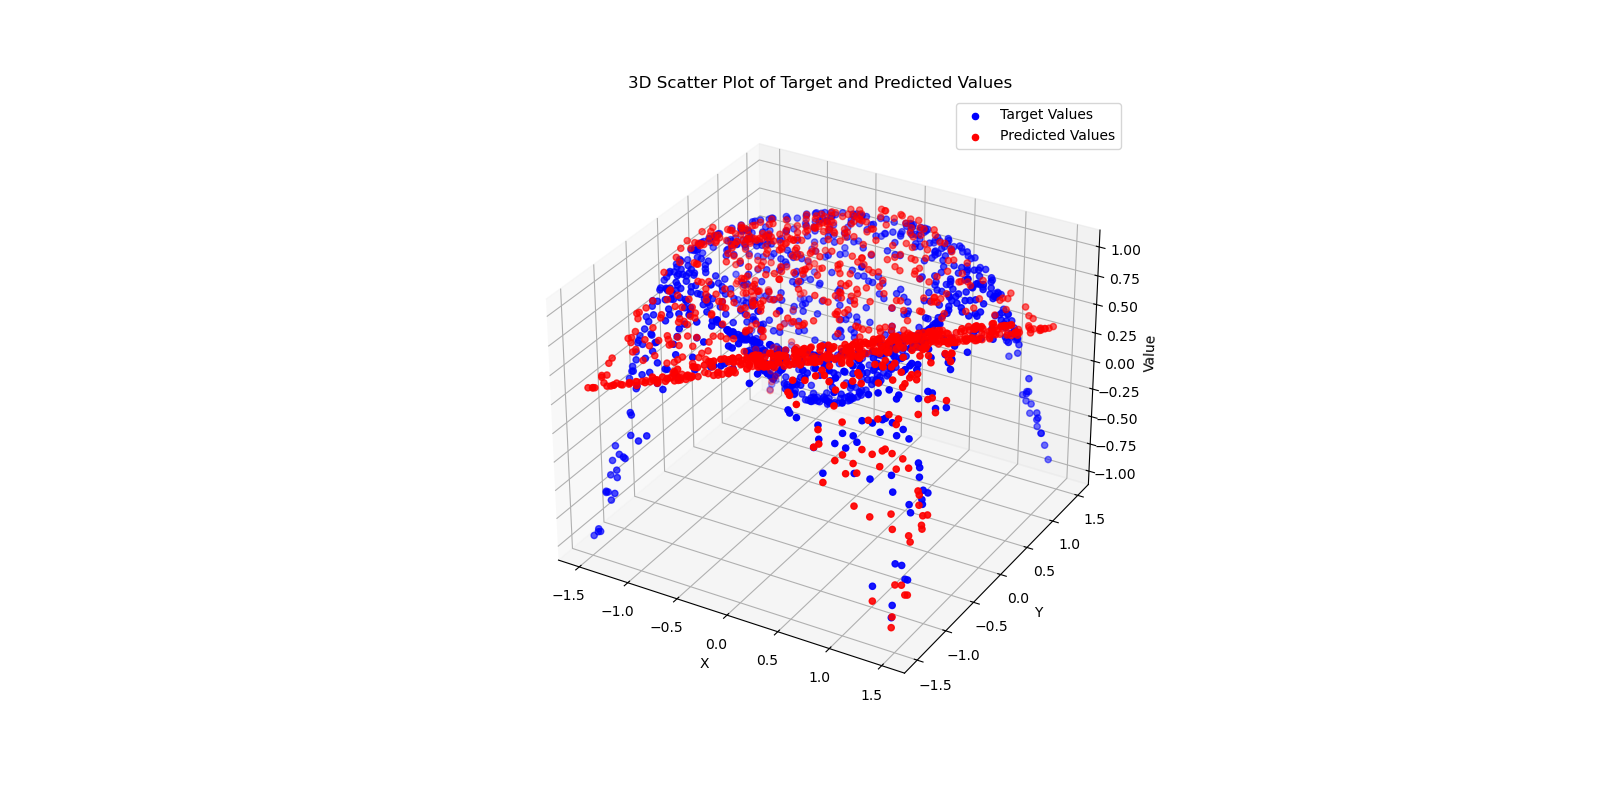

In [110]:
#######  predict f(x) with new x values
from mpl_toolkits.mplot3d import Axes3D
open_figures = []
# Function to close old figures if overwritten because otherwise jupyter complains a lot
def close_previous_figures():
    global open_figures
    if len(open_figures) > 20:
        # Close the first figure in the list
        plt.close(open_figures[0])
        # Remove the closed figure from the list
        open_figures = open_figures[1:]


# Enable interactive plotting in JupyterLab so that i can rotate the plot. NOTE: I had to install ipympl in Anaconda for this to run
%matplotlib widget


#x_predicted = np.random.uniform(-3./2, 3./2, 1000)
#y_predicted = np.random.uniform(-3./2, 3./2, 1000)
#xy_predicted = np.column_stack((x_predicted, y_predicted))

num_points = 1000
x_points = np.random.uniform(-3./2, 3./2, num_points)
y_points = np.random.uniform(-3./2, 3./2, num_points)

xy_points = np.column_stack((x_points, y_points))

# Assuming the model is already defined and trained
# Predict the values
z_predicted = model.predict(xy_points)

# Evaluate sin2d function at the points
z_target = sin2d(x_points, y_points)

# Plot the points
fig = plt.figure(figsize=(16, 8))

# Create 3D scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_points, y_points, z_target, color='b', label='Target Values')
ax.scatter(x_points, y_points, z_predicted, color='r', label='Predicted Values')

ax.set_title('3D Scatter Plot of Target and Predicted Values')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
ax.legend()

plt.show()

close_previous_figures()

While not perfect, with almost 200'000 parameters it has learned that there are 4 'legs' and a cavity and with a final loss of around 0.11 this is honestly the best result I've got